<a href="https://colab.research.google.com/github/gkadusumilli/Machinelearning/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Gopalakrishna A (gk1291@outlookcom)
#Prediction of coronary Heart disease  using Top 3 Machine Learning Algorithms

Machine Learning Algorithms used for prediction

1. Support Vector Machines

2. K Nearest Neighbour

3. ANN Multilayer Perceptron

## Dataset

Dataset can be obtained from [Dataset](https://www.openml.org/d/1498)



###Inputs to algorithm

1. Symbolic blood pressure(Sbp)
2. Cumulative tobacco consumption (kg)
3. Low density lipoprotein (LDL-cholestrol)
4. Adiposity
5. Family history of heart disease(present/Absent)
6. Obesity
7. Current alchohol consmption 
8. Age during onset of condition
9. CHD(Coronary Heart Disease) Response.





## Importing Libraries

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



## Data Preprocessing

In [0]:
#Loading the data
from google.colab import files
uploaded= files.upload()

Saving phpgNaXZe.csv to phpgNaXZe.csv


In [0]:
#Reading the data
data=pd.read_csv('phpgNaXZe.csv')

#setting up the coloumn

column=['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alchohol'
       ,'age','chd']

data.columns=column


data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alchohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


##Feature Scaling

We don't have any missing values in our data and to equalize the values of various attributes, we apply **Feature Scaling** and **Min-Max Scaling**.

In [0]:
#feature scaling, making categorical data precise

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,100))
tmp_array=np.array(data['sbp'],dtype="float32").reshape(len(data),-1)
tmp_array=scaler.fit_transform(tmp_array)
data['sbp']=tmp_array.reshape(len(data),)
encoder=LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alchohol,age,chd
0,50.427345,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752136,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529907,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974358,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205124,13.60,3.50,27.78,0,60,25.99,57.34,49,1


##Data after Modification


In [0]:
#Data after Modification
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alchohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.903280,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,17.518221,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,0.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,19.658119,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,28.205124,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,40.170937,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,99.999992,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


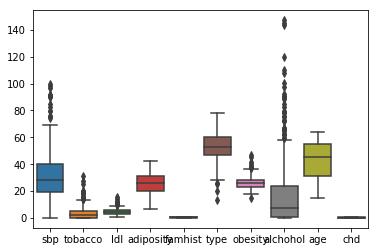

In [0]:

sns.boxplot(data=data)


##Data Visualization



### Obesity vs age
Below scatter graph(obesity vs age) gives us information, we can observe the clusters mainly in the following age groups:

1. Before the age of 20

2. After the age 40 and mostly in 50's

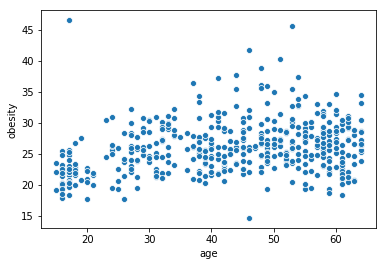

In [0]:
sns.scatterplot(x='age',y='obesity',data=data)

### Tobaco Consumption Vs Age

from below graph, we can see that the consumption increases after the age of 30.

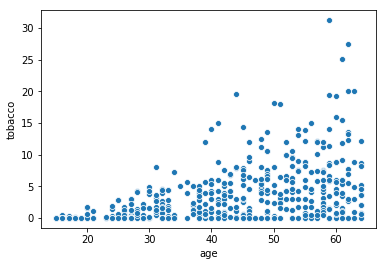

In [0]:
sns.scatterplot(x='age',y='tobacco',data=data)

###Alchohol Consumption vs age

From graph,it is observed that maximum alchohol consumption begins right after 25 years of age

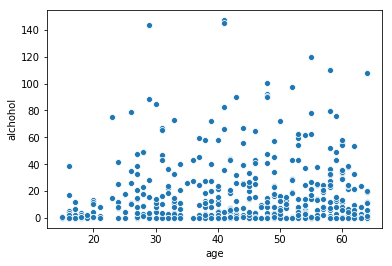

In [0]:
sns.scatterplot(x='age',y='alchohol',data=data)

## Splitting Data



In [0]:
#@title Splitting Data
#splitting the data into test and train having a test size of 20% and 80%train size

from sklearn.model_selection import train_test_split
col=['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alchohol','age']
X_train,X_test,y_train,y_test=train_test_split(data[col],data['chd'],test_size=0.2,random_state=1234)

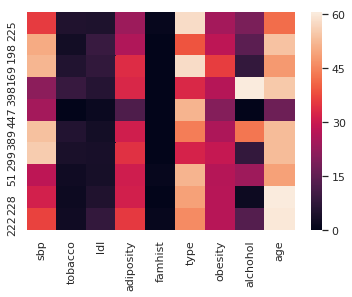

In [0]:
sns.set()
sns.heatmap(X_train.head(10),robust=True)

In [0]:
X_all=data[col]

y_all=data['chd']

## Prediction

###1. Support Vector Machine

A Support Vector Machine(SVM) is a discriminative classifier defined by a separating hyperplane.

In other words, given labeled training data(supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples

to know more visit https://scikit-learn.org/stable/modules/svm.html

**kernel used:Linear**

**Degree=3**

**Gamma=Auto**

In [0]:
from sklearn import svm
svm_clf=svm.SVC(kernel='linear')

svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_svm=svm_clf.predict(X_test)

y_pred_svm
 
#0= no heart disease indication
#1= Heart disease 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0])

In [0]:
#making confusion matrix

from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test,y_pred_svm)
cm_svm


array([[51,  9],
       [15, 18]])

In [0]:
from sklearn.metrics import accuracy_score
svm_result=accuracy_score(y_test,y_pred_svm)

print("Accuracy:",svm_result)

Accuracy: 0.7419354838709677


In [0]:
recall_svm=cm_svm[0][0]/(cm_svm[0][0]+cm_svm[0][1])

precision_svm=cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.85, 0.7391304347826086)

## SVM Result

###Accuracy:74%
###Recall:0.85
###Precision:0.739

##2. K Nearest Neibhour

**Neighbors=5**

**N jobs=No of cores,-1**

**Leaf size=60**

**Algorithm=Brute**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5,n_jobs=-1,leaf_size=60,algorithm='brute')


In [0]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn=knn_clf.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [0]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[49, 11],
       [22, 11]])

In [0]:
knn_result=accuracy_score(y_test,y_pred_knn)
knn_result

0.6451612903225806

In [0]:
recall_knn=cm_knn[0][0]/(cm_knn[0][0]+cm_knn[0][1])
precision_knn=cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_knn,precision_knn

(0.8166666666666667, 0.8166666666666667)

## KNN Result

###Accuracy:76%

###Recall: 0.866

###Precision:0.732

##3. ANN Multilayer Perceptron Classifier

**Input nodes:9**

**Hidden layers:2**

**Each hidden layer hold 14 neuron**

**Output layer:2**

In [0]:
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [0]:
ann_clf=MLPClassifier()

#parameters
parameters={'solver':['lbfgs'],'alpha':[1e-4],'hidden_layer_sizes':(9,14,14,2),
           #9 input,14-14neuron in 2 layers,1 output layer
           'random_state':[1]}


In [0]:
#Type of scoring to compare parameter combos

acc_scorer=make_scorer(accuracy_score)
#run grid search
grid_obj=GridSearchCV(ann_clf,parameters,scoring=acc_scorer)
grid_obj=grid_obj.fit(X_train,y_train)

#pick the best combination of parameters
ann_clf=grid_obj.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
#fit the best algorithm to the data

ann_clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=14, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_pred_ann=ann_clf.predict(X_test)

In [0]:
#making the confusion matrix

from sklearn.metrics import confusion_matrix
cm_ann=confusion_matrix(y_test,y_pred_ann)
cm_ann

array([[60,  0],
       [33,  0]])

In [0]:
ann_result=accuracy_score(y_test,y_pred_ann)
ann_result

0.6451612903225806

In [0]:
recall_ann=cm_ann[0][0]/(cm_ann[0][0]+cm_ann[0][1])
precision_ann=cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(1.0, 1.0)

## ANN Result

###Accuracy: 64%
###Recall:0.866
###Precision:0.732


##Comaparision of Models between SVM, KNN,ANN

In [0]:
results={'Accurcy':[svm_result*100,knn_result*100,ann_result*100],
         'recall':[recall_svm*100,recall_knn*100,recall_ann*100],
         'precision':[precision_svm*100,precision_knn*100,precision_ann*100]
        }

index=['SVM','KNN','ANN']

In [0]:
results=pd.DataFrame(results,index=index)

Bar plot of three model implemented
**X axis**:Models

**Y axis**:Values of Accuracy,Precision,Recall

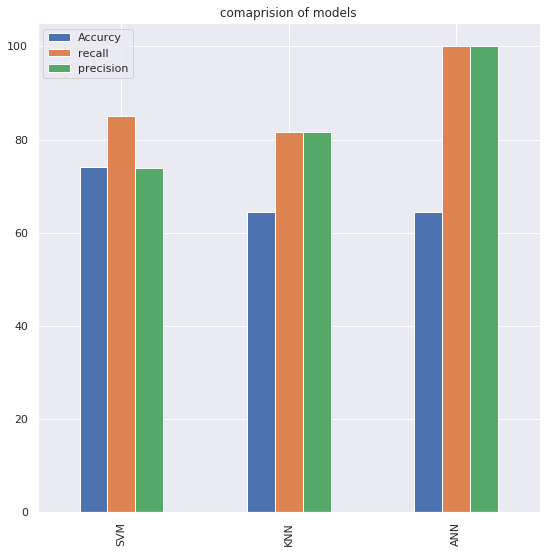

In [0]:
fig=results.plot(kind='bar',title='comaprision of models',figsize=(9,9))

